# $7^{th}$ exercise

## Notebook setup

#### Used libraries

In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#### Functions

In [2]:
def Ac(data,dt):
    d0=data[:-dt]
    d1=data[dt:]
    num = np.average(d0*d1) - np.average(d0) * np.average(d1)
    return num/np.var(data)

def Err(ave, av2, n):
    if n == 0:
        return 0
    return np.sqrt((av2 - ave**2) / n)

def DataBlockingErr(data,n_blocks,steps):
    ave=0.
    av2=0.
    for n in range(n_blocks):
        blkave=np.sum(data[n*steps:(n+1)*steps])/steps
        ave+=blkave
        av2+=blkave**2
    return Err(ave/n_blocks, av2/n_blocks,n_blocks-1)


#### Useful variables

In [3]:
states = ("solid","liquid","gas")

#### Colors, just for fun

In [4]:
stb = "#191724" #background
ndb = "#26233a" #object background
ste = "#e0def4" #main elements
nde = "#f6c177" #additional elements
rde = "#eb6f92" #element in evidence
err = "#908caa" #error bar
er2 = "#6e6a86" #second error bar

## 04.2 - Molecular dynamics in the microcanonical ensamble: Argon in the Lennard-Jones approximation

### Introductory notes


### Brief recap
**Goal:** Simulate a system of Argon in the Lennard-Jones approximation in the phases:
- Solid $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- Liquid $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- Gas $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

**Expectations:**  

### Equilibration

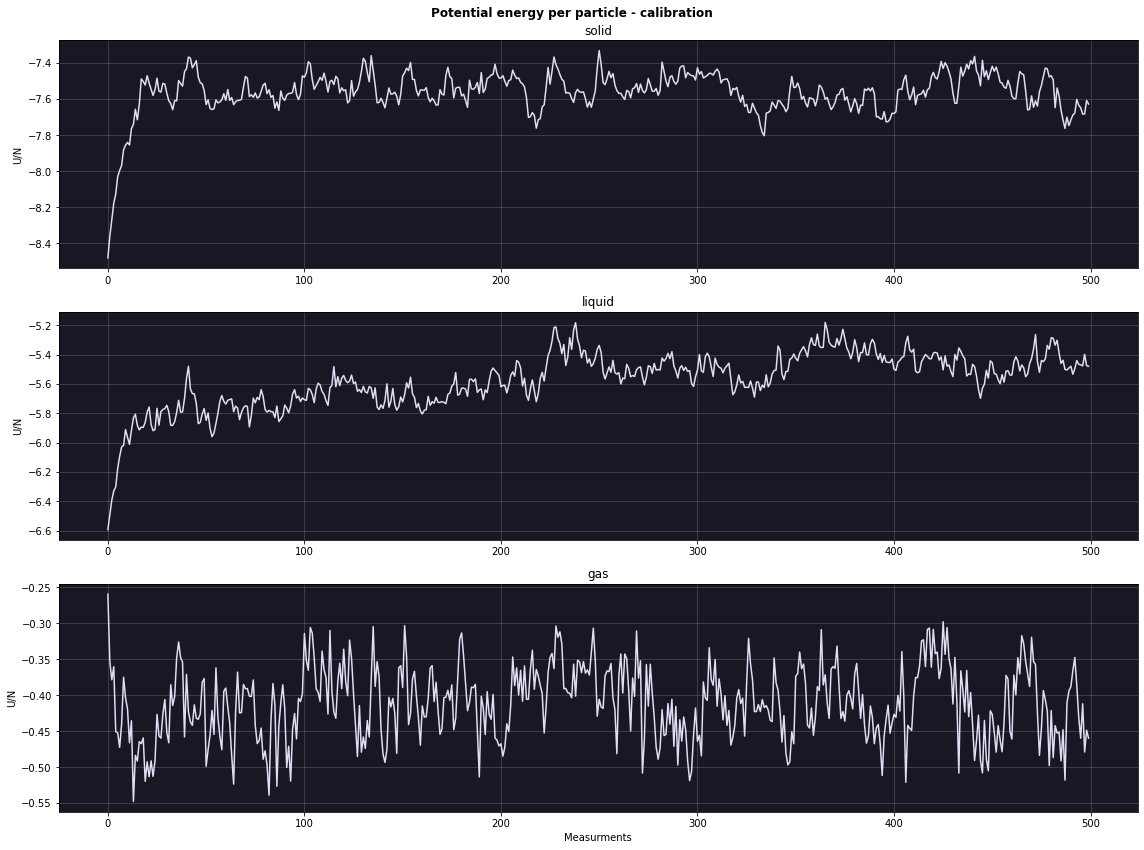

In [18]:
fig=plt.figure(figsize=(16, 12))

plt.suptitle('Potential energy per particle - calibration', weight='bold')

x=np.arange(0,500)
for i in (0,1,2):
    y = np.loadtxt("store/"+states[i]+"/equi.dat", usecols=0,unpack=True)
    y=y[:500]

    plt.subplot(3,1,i+1)
    plt.title(states[i])
    fig.axes[i].set_facecolor(stb)

    plt.plot(x,y,color=ste)

    plt.ylabel('U/N')
    plt.grid(alpha=0.3)

    


plt.xlabel('Measurments')

plt.tight_layout()
plt.show()

As we can see we reach equilibrium after less than 100 steps for the solid phase... perch√® metto 200???

### Autocorrelation

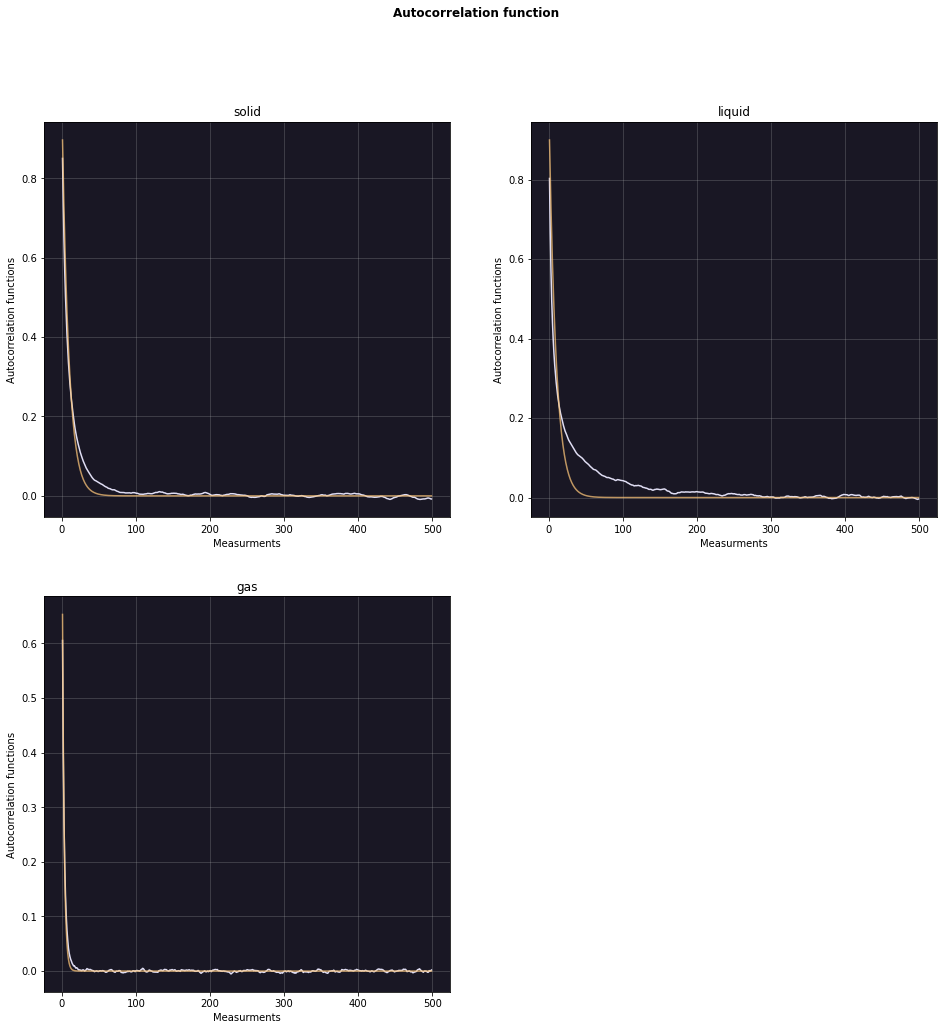

In [10]:
def f(x, t_c):
    return  np.exp(-x/t_c)

fig=plt.figure(figsize=(16, 16))
x=np.arange(1,500)

plt.suptitle('Autocorrelation function', weight='bold')

for i in (0,1,2):
    plt.subplot(2,2,i+1)
    plt.title(states[i])
    fig.axes[i].set_facecolor(stb)

    data = np.loadtxt("store/"+states[i]+"/epot_instant.dat", usecols=0,unpack=True)
    y=np.fromiter((Ac(data,i) for i in x),np.double)
    plt.plot(x,y,color=ste)
    
    popt, pcov = curve_fit(f, x, y)
    plt.plot(x, f(x, *popt), label="Fit", color=nde, alpha=0.75)

    plt.ylabel('Autocorrelation functions')
    plt.xlabel('Measurments')

    plt.grid(alpha=0.3)



plt.show()

### Liquid
#### Equilibration

In [22]:
block_lenghts=np.linspace(10,5000,100,dtype='int')
print(block_lenghts)

[  10   60  110  161  211  262  312  362  413  463  514  564  614  665
  715  766  816  866  917  967 1018 1068 1118 1169 1219 1270 1320 1370
 1421 1471 1522 1572 1622 1673 1723 1774 1824 1874 1925 1975 2026 2076
 2126 2177 2227 2278 2328 2378 2429 2479 2530 2580 2631 2681 2731 2782
 2832 2883 2933 2983 3034 3084 3135 3185 3235 3286 3336 3387 3437 3487
 3538 3588 3639 3689 3739 3790 3840 3891 3941 3991 4042 4092 4143 4193
 4243 4294 4344 4395 4445 4495 4546 4596 4647 4697 4747 4798 4848 4899
 4949 5000]


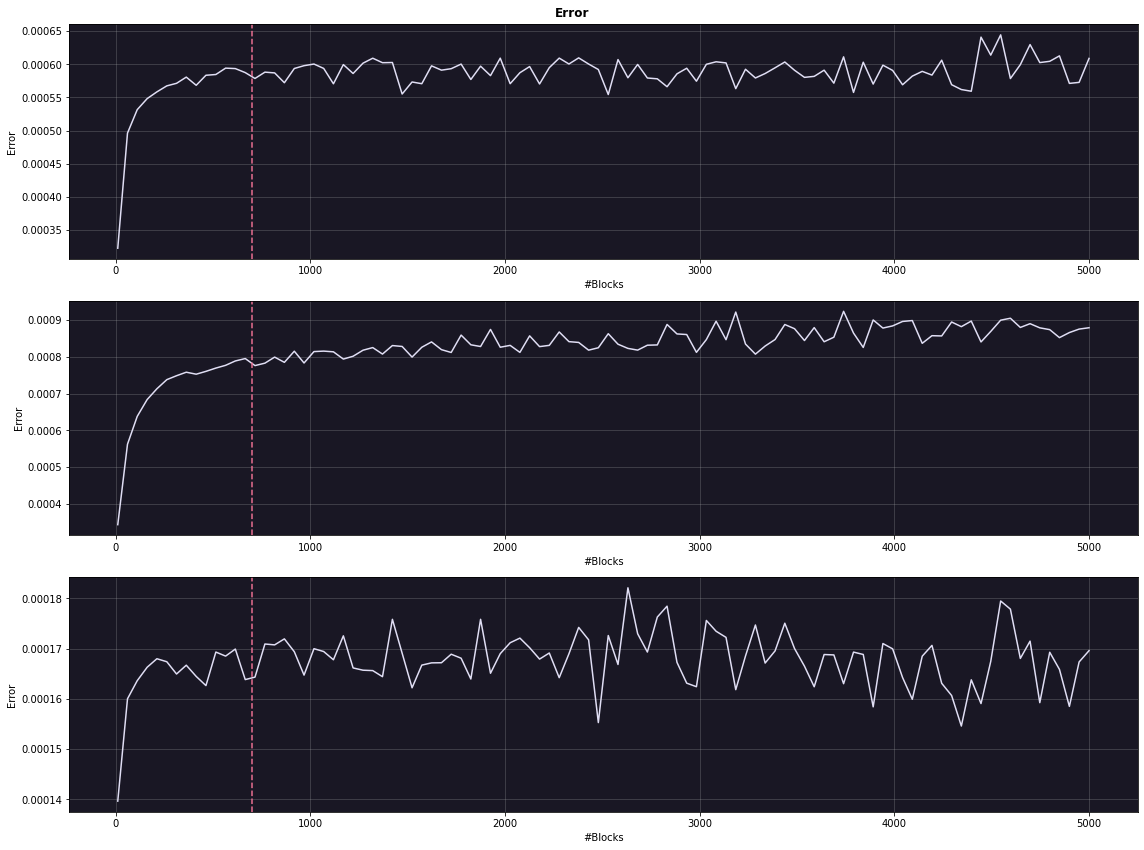

In [34]:
fig=plt.figure(figsize=(16, 12))

plt.suptitle('Error', weight='bold')

for i in (0,1,2):
    plt.subplot(3,1,i+1)
    fig.axes[i].set_facecolor(stb)
    data = np.loadtxt("store/"+states[i]+"_epot_instant.dat", usecols=0,unpack=True)
    y=np.fromiter((DataBlockingErr(data,int(5e5/L),L) for L in block_lenghts),np.double)

    plt.plot(block_lenghts,y,color=ste)
    plt.axvline(700,ls="--", color=rde)



    plt.ylabel('Error')
    plt.xlabel('#Blocks')

    plt.grid(alpha=0.3)



plt.tight_layout()
plt.show()

As we can see, after 700 blocks it almost saturate the error

#### Simulation

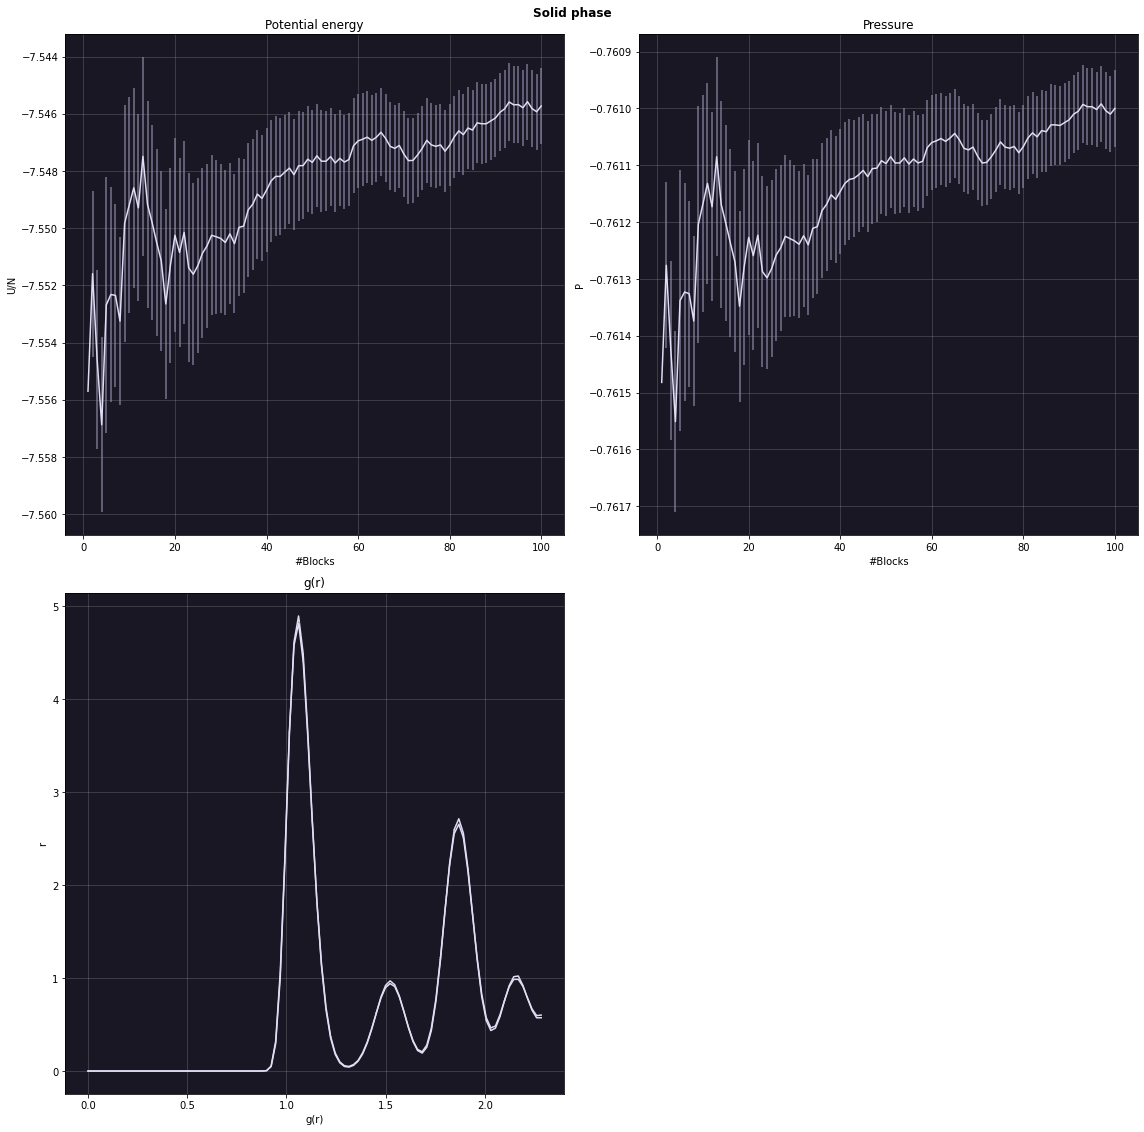

In [52]:
state="solid"

fig=plt.figure(figsize=(16, 16))
plt.suptitle('Solid phase', weight='bold')

#potential energy
x,y,e = np.loadtxt("store/"+state+"/output_epot.dat", usecols=(0,2,3),unpack=True)

plt.subplot(221)
fig.axes[0].set_facecolor(stb)

plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.errorbar(x,y,color=ste)

plt.xlabel('#Blocks')
plt.ylabel('U/N')
plt.title("Potential energy")
plt.grid(alpha=0.3)

#Pressure
x,y,e = np.loadtxt("store/"+state+"/output_pres.dat", usecols=(0,2,3),unpack=True)

plt.subplot(222)
fig.axes[1].set_facecolor(stb)

plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.errorbar(x,y,color=ste)

plt.xlabel('#Blocks')
plt.ylabel('P')
plt.title("Pressure")
plt.grid(alpha=0.3)


#g(r)
x,y_nvt,e_nvt = np.loadtxt("store/"+state+"/output_gfin_nvt.dat", usecols=(0,1,2),unpack=True)
x,y_nve,e_nve = np.loadtxt("store/"+state+"/output_gfin_nve.dat", usecols=(0,1,2),unpack=True)


plt.subplot(223)
fig.axes[2].set_facecolor(stb)

plt.vlines(x,y_nvt-e_nvt,y_nvt+e_nvt,color=err,alpha=0.8)
plt.plot(x,y_nvt,color=ste)
plt.vlines(x,y_nve-e_nve,y_nve+e_nve,color=err,alpha=0.8)
plt.plot(x,y_nve,color=ste)

plt.xlabel('g(r)')
plt.ylabel('r')
plt.title("g(r)")
plt.grid(alpha=0.3)

plt.tight_layout()


plt.show()

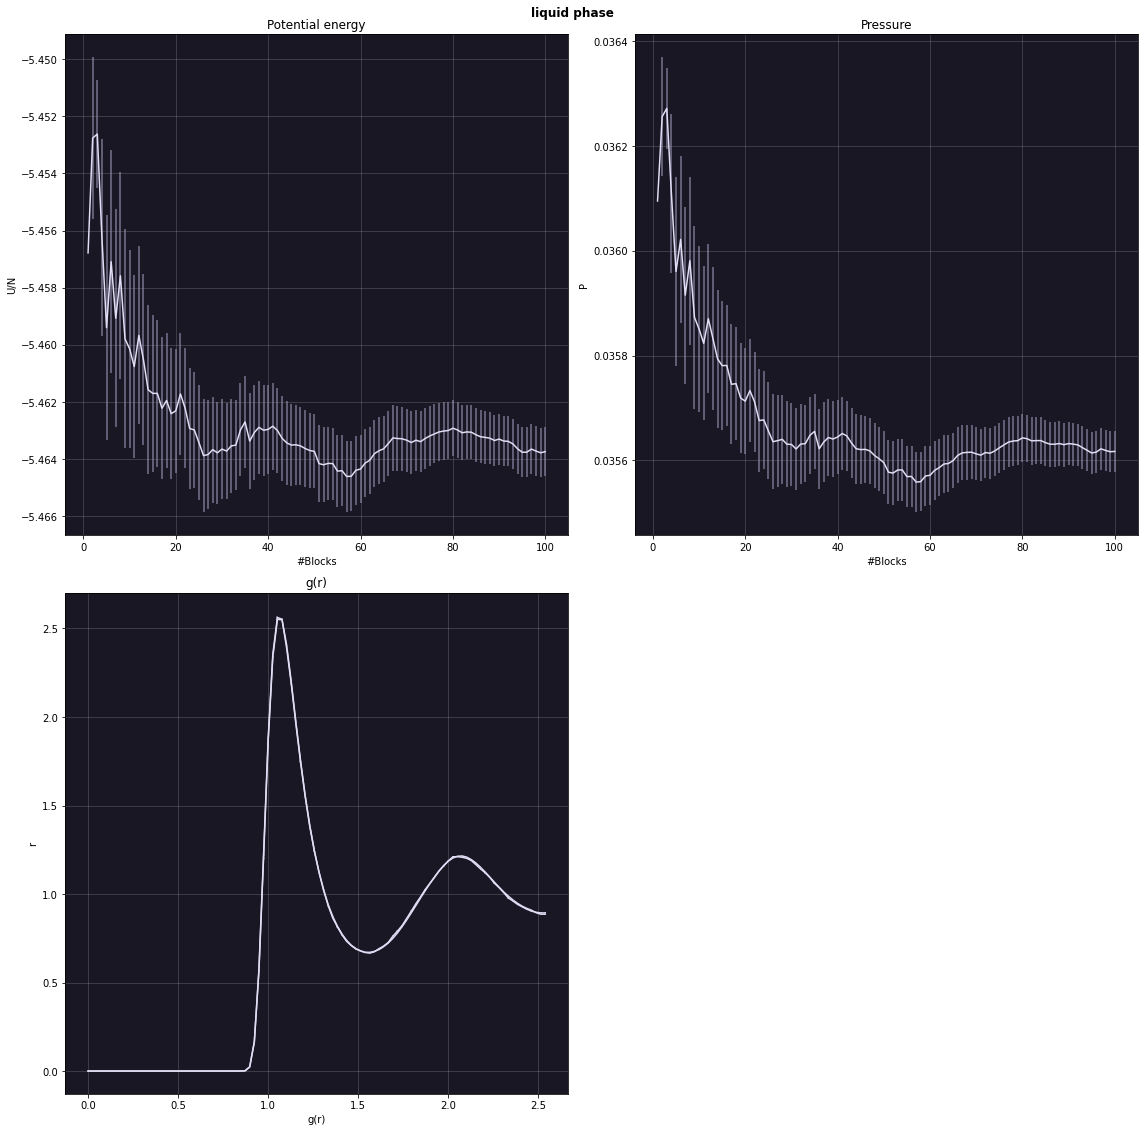

In [51]:
state="liquid"

fig=plt.figure(figsize=(16, 16))
plt.suptitle('liquid phase', weight='bold')

#potential energy
x,y,e = np.loadtxt("store/"+state+"/output_epot.dat", usecols=(0,2,3),unpack=True)

plt.subplot(221)
fig.axes[0].set_facecolor(stb)

plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.errorbar(x,y,color=ste)

plt.xlabel('#Blocks')
plt.ylabel('U/N')
plt.title("Potential energy")
plt.grid(alpha=0.3)

#Pressure
x,y,e = np.loadtxt("store/"+state+"/output_pres.dat", usecols=(0,2,3),unpack=True)

plt.subplot(222)
fig.axes[1].set_facecolor(stb)

plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.errorbar(x,y,color=ste)

plt.xlabel('#Blocks')
plt.ylabel('P')
plt.title("Pressure")
plt.grid(alpha=0.3)


#g(r)
x,y_nvt,e_nvt = np.loadtxt("store/"+state+"/output_gfin_nvt.dat", usecols=(0,1,2),unpack=True)
x,y_nve,e_nve = np.loadtxt("store/"+state+"/output_gfin_nve.dat", usecols=(0,1,2),unpack=True)


plt.subplot(223)
fig.axes[2].set_facecolor(stb)

plt.vlines(x,y_nvt-e_nvt,y_nvt+e_nvt,color=err,alpha=0.8)
plt.plot(x,y_nvt,color=ste)
plt.vlines(x,y_nve-e_nve,y_nve+e_nve,color=err,alpha=0.8)
plt.plot(x,y_nve,color=ste)

plt.xlabel('g(r)')
plt.ylabel('r')
plt.title("g(r)")
plt.grid(alpha=0.3)

plt.tight_layout()


plt.show()

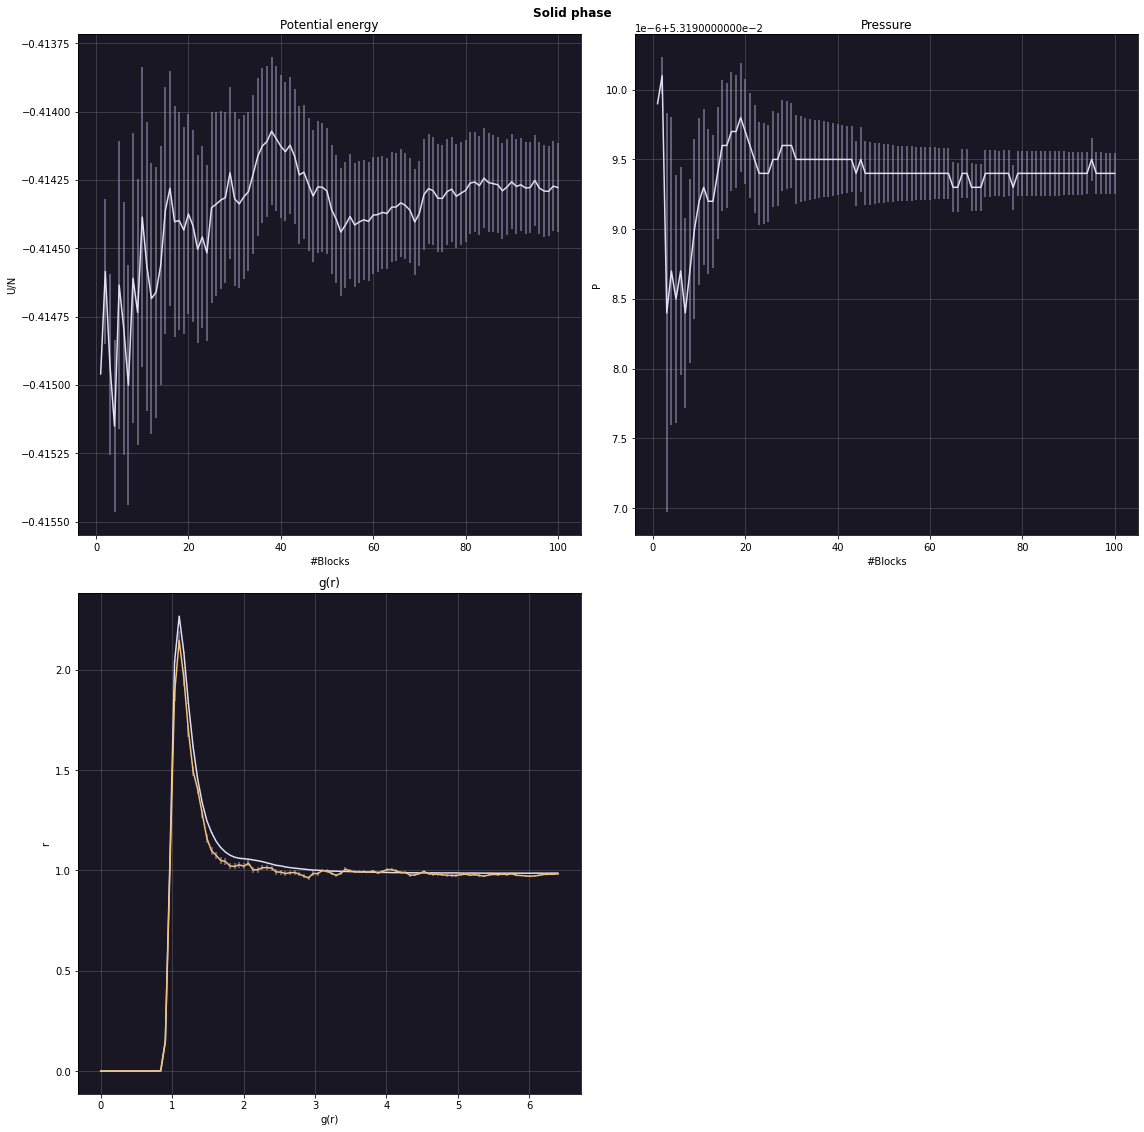

In [49]:
state="gas"

fig=plt.figure(figsize=(16, 16))
plt.suptitle('Solid phase', weight='bold')

#potential energy
x,y,e = np.loadtxt("store/"+state+"/output_epot.dat", usecols=(0,2,3),unpack=True)

plt.subplot(221)
fig.axes[0].set_facecolor(stb)

plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.errorbar(x,y,color=ste)

plt.xlabel('#Blocks')
plt.ylabel('U/N')
plt.title("Potential energy")
plt.grid(alpha=0.3)

#Pressure
x,y,e = np.loadtxt("store/"+state+"/output_pres.dat", usecols=(0,2,3),unpack=True)

plt.subplot(222)
fig.axes[1].set_facecolor(stb)

plt.vlines(x,y-e,y+e,color=err,alpha=0.8)
plt.errorbar(x,y,color=ste)

plt.xlabel('#Blocks')
plt.ylabel('P')
plt.title("Pressure")
plt.grid(alpha=0.3)


#g(r)
x,y_nvt,e_nvt = np.loadtxt("store/"+state+"/output_gfin_nvt.dat", usecols=(0,1,2),unpack=True)
x,y_nve,e_nve = np.loadtxt("store/"+state+"/output_gfin_nve.dat", usecols=(0,1,2),unpack=True)


plt.subplot(223)
fig.axes[2].set_facecolor(stb)

plt.vlines(x,y_nvt-e_nvt,y_nvt+e_nvt,color=err,alpha=0.8)
plt.plot(x,y_nvt,color=ste)
plt.vlines(x,y_nve-e_nve,y_nve+e_nve,color=err,alpha=0.8)
plt.plot(x,y_nve,color=nde)

plt.xlabel('g(r)')
plt.ylabel('r')
plt.title("g(r)")
plt.grid(alpha=0.3)

plt.tight_layout()


plt.show()